# Tugas Kecil 1 IF3270 Pembelajaran Mesin

### Anggota Kelompok
### - 13519057 Kadek Dwi Bagus
### - 13519217 Hughie Alghaniyyu Emiliano

#### Import Dataset Play Tennis

In [27]:
import pandas as pd

df = pd.read_csv("play_tennis.csv")
df

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


##### Drop Unused Feature & Encoding Data 

In [28]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()

df = df.drop(['day'], axis=1)

df['outlook'] = labelEncoder.fit_transform(df['outlook'])
df['temp'] = labelEncoder.fit_transform(df['temp'])
df['humidity'] = labelEncoder.fit_transform(df['humidity'])
df['wind'] = labelEncoder.fit_transform(df['wind'])
df['play'] = labelEncoder.fit_transform(df['play'])
df

,outlook,temp,humidity,wind,play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


##### Split Data Feature with Result

In [29]:
data = df.drop(['play'], axis=1)
result = df.play

#### Split Dataset to 80% for Training and 20% for Testing

In [30]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_result, test_result = train_test_split(data, result, test_size=0.20)
training_data, testing_data = train_test_split(df, test_size=0.2, random_state=25)

train_percentage = round((training_data.shape[0] / (training_data.shape[0] + testing_data.shape[0])) * 100, 2)
print(f"Amount of training data : {training_data.shape[0]} ({train_percentage}%)")

test_percentage = round((testing_data.shape[0] / (training_data.shape[0] + testing_data.shape[0])) * 100, 2)
print(f"Amount of testing data  : {testing_data.shape[0]} ({test_percentage}%)")

Amount of training data : 11 (78.57%)
Amount of testing data  : 3 (21.43%)


##### Training Data

In [31]:
train_data

,outlook,temp,humidity,wind
12,0,1,1,1
4,1,0,1,1
10,2,2,1,0
1,2,1,0,0
2,0,1,0,1
9,1,2,1,1
6,0,0,1,0
0,2,1,0,1
13,1,2,0,0
5,1,0,1,0


##### Training Result

In [32]:
train_result

12    1
4     1
10    1
1     0
2     1
9     1
6     1
0     0
13    0
5     0
11    1
Name: play, dtype: int32

##### Testing Data

In [33]:
test_data

,outlook,temp,humidity,wind
7,2,2,0,1
3,1,2,0,1
8,2,0,1,1


##### Testing Result

In [34]:
test_result

7    0
3    1
8    1
Name: play, dtype: int32

#### Decision Tree Classifier

[Text(0.3333333333333333, 0.9, 'X[0] <= 0.5\ngini = 0.463\nsamples = 11\nvalue = [4, 7]'),
 Text(0.16666666666666666, 0.7, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5, 0.7, 'X[2] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.6666666666666666, 0.5, 'X[1] <= 1.0\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.5, 0.3, 'X[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8333333333333334, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

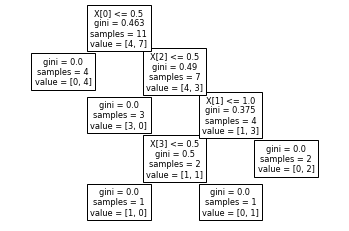

In [35]:
from sklearn import tree

clfDTC = tree.DecisionTreeClassifier()
clfDTC = clfDTC.fit(train_data, train_result)
tree.plot_tree(clfDTC)

In [36]:
from sklearn import metrics

prediction = clfDTC.predict(test_data)
print(metrics.confusion_matrix(test_result, prediction))

[[1 0]
 [1 1]]


In [37]:
print(metrics.classification_report(test_result, prediction))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [38]:
print(f"Accuracy     : {metrics.accuracy_score(test_result, prediction)}")
print(f"Precision    : {metrics.precision_score(test_result, prediction)}")
print(f"Recall       : {metrics.recall_score(test_result, prediction)}")

Accuracy     : 0.6666666666666666
Precision    : 1.0
Recall       : 0.5


#### ID3 ESTIMATOR

In [39]:
from id3.id3 import Id3Estimator
estimator = Id3Estimator()

In [40]:
estimator = estimator.fit(train_data, train_result)

In [41]:
prediction = estimator.predict(test_data)
print(metrics.confusion_matrix(test_result, prediction))
print(metrics.classification_report(test_result, prediction))

[[1 0]
 [1 1]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [42]:
print(f"Accuracy     : {metrics.accuracy_score(test_result, prediction)}")
print(f"Precision    : {metrics.precision_score(test_result, prediction)}")
print(f"Recall       : {metrics.recall_score(test_result, prediction)}")

Accuracy     : 0.6666666666666666
Precision    : 1.0
Recall       : 0.5


#### K-Means

In [43]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(train_data)
kmeans.labels_

array([1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [44]:
kmeans.cluster_centers_

array([[1.33333333, 1.66666667, 0.33333333, 0.33333333],
       [0.4       , 0.4       , 0.8       , 0.6       ]])

In [45]:
from sklearn import metrics

prediction = kmeans.fit_predict(test_data)
print(metrics.confusion_matrix(test_result, prediction))

[[1 0]
 [1 1]]


In [46]:
print(metrics.classification_report(test_result, prediction))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [47]:
print(f"Accuracy     : {metrics.accuracy_score(test_result, prediction)}")
print(f"Precision    : {metrics.precision_score(test_result, prediction)}")
print(f"Recall       : {metrics.recall_score(test_result, prediction)}")

Accuracy     : 0.6666666666666666
Precision    : 1.0
Recall       : 0.5


#### Logistic Regression

In [48]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear')
logreg.fit(train_data, train_result)

LogisticRegression(solver='liblinear')

In [49]:
from sklearn import metrics

prediction=logreg.predict(test_data)
print(metrics.confusion_matrix(test_result, prediction))

[[1 0]
 [1 1]]


In [50]:
print(metrics.classification_report(test_result, prediction))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [51]:
print(f"Accuracy     : {metrics.accuracy_score(test_result, prediction)}")
print(f"Precision    : {metrics.precision_score(test_result, prediction)}")
print(f"Recall       : {metrics.recall_score(test_result, prediction)}")

Accuracy     : 0.6666666666666666
Precision    : 1.0
Recall       : 0.5


#### Neural Network MLP Classifier

In [52]:
from sklearn.neural_network import MLPClassifier

mlpc = MLPClassifier(random_state=1, solver='lbfgs')
mlpc.fit(train_data, train_result)

MLPClassifier(random_state=1, solver='lbfgs')

In [53]:
from sklearn import metrics

prediction=logreg.predict(test_data)
print(metrics.confusion_matrix(test_result, prediction))

[[1 0]
 [1 1]]


In [54]:
print(metrics.classification_report(test_result, prediction))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



In [55]:
print(f"Accuracy     : {metrics.accuracy_score(test_result, prediction)}")
print(f"Precision    : {metrics.precision_score(test_result, prediction)}")
print(f"Recall       : {metrics.recall_score(test_result, prediction)}")

Accuracy     : 0.6666666666666666
Precision    : 1.0
Recall       : 0.5


#### SVM

In [56]:
from sklearn import svm 

clfSVM = svm.SVC()
clfSVM.fit(train_data, train_result)

SVC()

In [57]:
prediction = clfSVM.predict(test_data)
print(metrics.confusion_matrix(test_result, prediction))

[[1 0]
 [0 2]]


In [58]:
print(metrics.classification_report(test_result, prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



In [59]:
print(f"Accuracy     : {metrics.accuracy_score(test_result, prediction)}")
print(f"Precision    : {metrics.precision_score(test_result, prediction)}")
print(f"Recall       : {metrics.recall_score(test_result, prediction)}")

Accuracy     : 1.0
Precision    : 1.0
Recall       : 1.0


#### Analisis
Berikut merupakan hasil analisis dari hasil Accuracy dan F1 score yang didapatkan dari ke-6 algoritma pembelajaran

##### Decision Tree Classifier
Decision Tree Classifier mendapatkan hasil Accuracy F1 score sebesar 0.67

##### ID3 Estimator
ID3 Estimator mendapatkan hasil Accuracy F1 score sebesar 0.67

##### K-Means
K-Means mendapatkan hasil Accuracy F1 score sebesar 0.67

##### Logistic Regression
Logistic Regression mendapatkan hasil Accuracy F1 score sebesar 0.67

##### Neural Network MLP Classifier
Neural Network MLP Classifier mendapatkan hasil Accuracy F1 score sebesar 0.67

##### SVM
SVM mendapatkan hasil Accuracy F1 score sebesar 1.00